In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
file_path = "/content/Housing_Macroeconomic_Factors_US (2).csv"
df = pd.read_csv(file_path)

df.head()


,Date,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
0,1987-01-01,63.965,241857,6.0,99.902813,9.2040,70.163085,1690.0,100.0,2.7439,100.4624,NaN,NaN
1,1987-02-01,64.424,242005,6.2,99.875864,9.0825,70.289205,1689.0,100.4,2.7475,100.4945,NaN,NaN
2,1987-03-01,64.735,242166,6.0,99.869734,9.0350,70.321678,1704.0,100.7,2.7537,100.5720,NaN,NaN
3,1987-04-01,65.132,242338,6.0,99.882087,9.8325,70.499062,1601.0,101.1,2.7677,100.6568,NaN,NaN
4,1987-05-01,65.565,242516,6.7,99.910371,10.5960,70.808308,1500.0,101.3,2.7729,100.6919,NaN,NaN


In [38]:
df.info()
df.describe()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               425 non-null    object 
 1   house_price_index  425 non-null    float64
 2   population         425 non-null    int64  
 3   house_supply       425 non-null    float64
 4   gdp                422 non-null    float64
 5   mortgage_rate      422 non-null    float64
 6   employment_rate    422 non-null    float64
 7   permit_new         422 non-null    float64
 8   ppi_res            422 non-null    float64
 9   m3                 422 non-null    float64
 10  cci                422 non-null    float64
 11  delinquency_rate   374 non-null    float64
 12  hcai               285 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 43.3+ KB


,0
Date,0
house_price_index,0
population,0
house_supply,0
gdp,3
mortgage_rate,3
employment_rate,3
permit_new,3
ppi_res,3
m3,3


In [39]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')


In [40]:
# Assuming your DataFrame is loaded as 'df'
print(list(df.columns))

['Date', 'house_price_index', 'population', 'house_supply', 'gdp', 'mortgage_rate', 'employment_rate', 'permit_new', 'ppi_res', 'm3', 'cci', 'delinquency_rate', 'hcai']


In [41]:
pct_cols = [
    'house_price_index',
    'gdp',
    'mortgage_rate',
    'employment_rate',  # This replaces a generic 'Unemployment_Rate' proxy
    'ppi_res'           # This replaces 'Consumer_Price_Index' (CPI proxy)
    # The other columns like 'population', 'house_supply', etc., are omitted
    # unless you specifically want their percentage change too.
]

# 2. ITERATE through the list and create the new percentage change columns
for col in pct_cols:
    # Calculate the percentage change (change() * 100) and store it in a new column
    # The new column will be named, for example, 'house_price_index_pct_change'
    try:
        df[f'{col}_pct_change'] = df[col].pct_change() * 100
    except KeyError:
        print(f"❌ Error: Column '{col}' not found in the DataFrame. Skipping this column.")

print("--- Percentage Change Calculation Complete ---")
print("✅ New columns successfully created for:")
print([f'{c}_pct_change' for c in pct_cols])
print("\nFirst 5 rows with new columns:")
print(df.head())

--- Percentage Change Calculation Complete ---
✅ New columns successfully created for:
['house_price_index_pct_change', 'gdp_pct_change', 'mortgage_rate_pct_change', 'employment_rate_pct_change', 'ppi_res_pct_change']

First 5 rows with new columns:
        Date  house_price_index  population  house_supply        gdp  \
0 1987-01-01             63.965      241857           6.0  99.902813   
1 1987-02-01             64.424      242005           6.2  99.875864   
2 1987-03-01             64.735      242166           6.0  99.869734   
3 1987-04-01             65.132      242338           6.0  99.882087   
4 1987-05-01             65.565      242516           6.7  99.910371   

   mortgage_rate  employment_rate  permit_new  ppi_res      m3       cci  \
0         9.2040        70.163085      1690.0    100.0  2.7439  100.4624   
1         9.0825        70.289205      1689.0    100.4  2.7475  100.4945   
2         9.0350        70.321678      1704.0    100.7  2.7537  100.5720   
3         9.8

/tmp/ipython-input-4056966018.py:16: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f'{col}_pct_change'] = df[col].pct_change() * 100
/tmp/ipython-input-4056966018.py:16: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f'{col}_pct_change'] = df[col].pct_change() * 100
/tmp/ipython-input-4056966018.py:16: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f'{col}_pct_change'] = df[col].pct_change() *

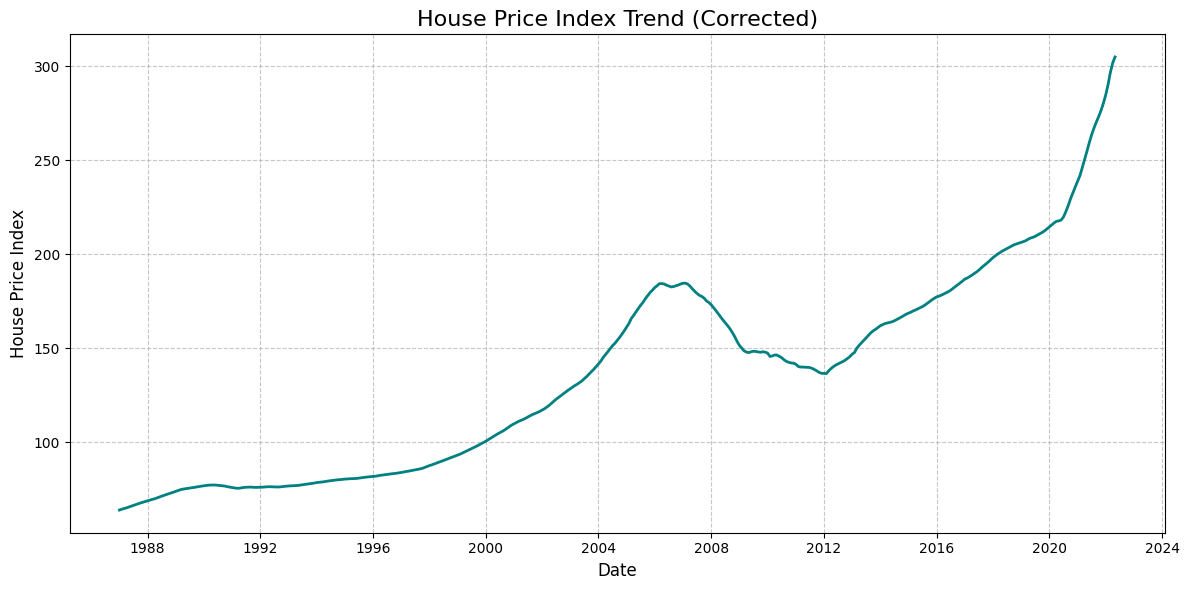

In [50]:
plt.figure(figsize=(12, 6)) # Added figure size for better visualization
plt.plot(df['Date'], df['house_price_index'], color='teal', linewidth=2)

plt.title("House Price Index Trend (Corrected)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("House Price Index", fontsize=12)

# Optional: Add grid and tight layout for better aesthetics
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

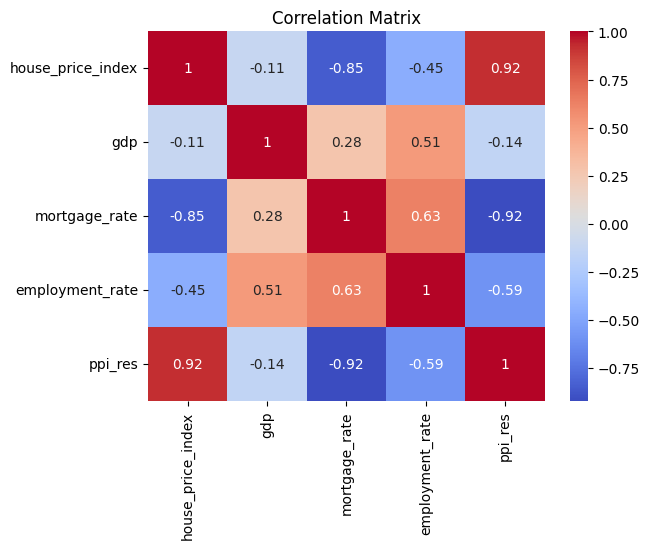

In [43]:
plt.figure()
sns.heatmap(
    df[pct_cols].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Matrix")
plt.show()


In [45]:
features = [
    'mortgage_rate_pct_change',
    'employment_rate_pct_change',
    'gdp_pct_change',
    'ppi_res_pct_change'
]

target_column = 'house_price_index_pct_change'

df_model = df.dropna()
X = df_model[features]
y = df_model[target_column]

print("--- Data Preparation Complete ---")
print("✅ X (Features) shape:", X.shape)
print("✅ y (Target) shape:", y.shape)

--- Data Preparation Complete ---
✅ X (Features) shape: (285, 4)
✅ y (Target) shape: (285,)


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [47]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


MAE: 0.4378766102952113
RMSE: 0.6094901887197307
R²: -0.2604237783715413


In [49]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

importance


,Feature,Coefficient
3,ppi_res_pct_change,0.121571
1,employment_rate_pct_change,0.108019
2,gdp_pct_change,0.076171
0,mortgage_rate_pct_change,0.018531
